<h1>Probability for ML - Teil II</h1>

<u>Agenda:</u>


1.   Background - Maximum Likelihood
2.   Anwendungsbeispiele
3.   Ressourcen zum Lernen
4.   Zusammenfassung


#**1. Background - Maximum Likelihood**

# Was war nochmal Likelihood?

**Beispiel:** Wenn ich eine faire Münze habe, dann ist die "Probability", dass sie Kopf ergibt bei 0,5. Wenn ich eine Münze 100-mal werfe und sie 52-mal Kopf ergibt, dann ist der/das "Likelihood" hoch, dass sie fair ist.

<u>Einfach:</u> Likelihood liefert support für unsere angenomme Probability.



--> Likelihood gibt an, inwieweit die zugrundeliegenden Daten die Wahl von Parametern unterstützen.

# Maximum Likelihood Estimation

Der Maximum-Likelihood-Estimator (MLE) ist ein probabilistischer Ansatz zur Bestimmung der Werte für die Parameter eines Modells. Parameter können als Blaupausen für das Modell definiert werden, auf dem der Algorithmus funktioniert. MLE ist eine weit verbreitete Technik für maschinelles Lernen. Das Motiv von MLE besteht darin, die Likelihood der Werte für die Parameter zu maximieren, um die gewünschten Ergebnisse zu erzielen.


*   Dabei wird eine Likelihood-Funktion maximiert, um die Wahrscheinlichkeitsverteilung und die Parameter zu finden, die die beobachteten Daten am besten erklären.
*   Bietet einen Rahmen für die prädiktive Modellierung beim maschinellen Lernen, bei dem die Suche nach Modellparametern als Optimierungsproblem betrachtet werden kann.




# Funktionsweise von MLE

Wir stellen uns ein binäres Klassifikationsproblem vor. Dabei wollen wir Daten jeweils einer Klasse, 0 oder 1, zuordnen. Um eine passende Trennlinie zwischen den Klassen zu modellieren, wird die maximum Likelihood bestimmt, dass ein betrachteter Datenpunkt entweder zu Klasse 0 oder 1 gehört. Dazu wird eine (beliebige) Linie durch die Datenpunkte gezogen und die Likelihood bestimmt. Dieser Prozess wird solange wiederholt bis die maximum Likelihood erreicht ist.
Die entsprechenden Berechnungsschritte findet ihr in Prof. Franczyk's Folien oder im Erklärvideo in Abschnitt 3.

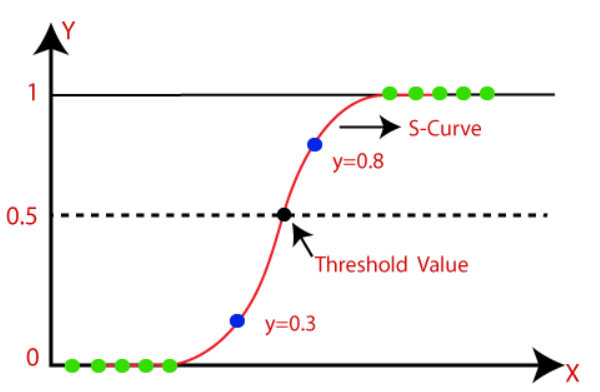

https://www.youtube.com/watch?v=BfKanl1aSG0

# MLE und Machine Learning

Das MLE-Framework kann insbesondere für Supervised Learning Verfahren, also Verfahren für die Input- und Output-Variablen bekannt sind, genutzt werden. Es bildet ein Fundament für lineare Modellierungstechniken, wie 

*   <u>Logistische Regression:</u> Für binäre Klassifikationen (z.B. gekauft / nicht gekauft) --> Im Falle der logistischen Regression beschreibt das Modell eine Linie (Hyperplane), wobei es darum geht, eine Reihe von Koeffizienten für die Linie zu finden, die die Klassen am besten trennt. 

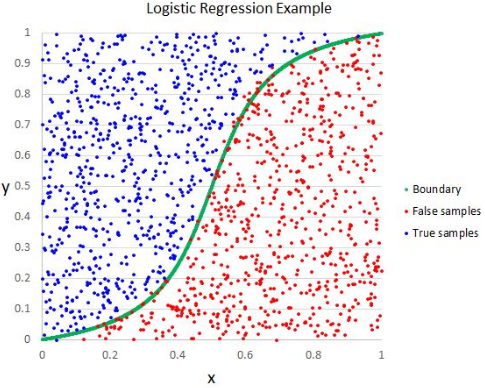

*   <u>Lineare Regression:</u> Für die Vorherage numerischer Werte (z.B. Umsätze) --> Im Falle der linearen Regression ist das Modell auf die Erzeugung einer Hyperplane ausgelegt sowie die Ermittlung einer Reihe von Koeffizienten für diese Hyperplane, die am besten zu den beobachteten Daten passt. (Least Squares Procedure)

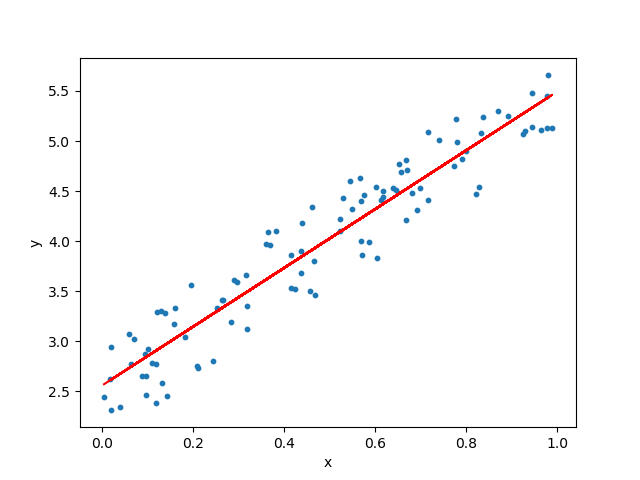



# 2. Anwendungsbeispiele

**Logistische Regression**

MLE ist die Grundlage vieler überwachter Lernmodelle, eines davon ist die logistische Regression. Die logistische Regression verwendet die Maximum-Likelihood-Technik zur Klassifizierung von Daten. Durch MLE-Verfahren kann eine bessere Effizienz und numerische Stabilität erreicht werden. 

Die logistische Regression ist eine lineare Methode für binäre Klassifikationsprobleme. Eine lineare Regression wird im Vergleich dafür genutzt, numerische Werte und keine Klassenlabel vorherzusagen.

Im Rahmen einer logistischen Regression wird eine Linie modelliert, die die gegebenen Klassen bestmöglich voneinander trennen soll.

<u>**Szenario 1:**</u> 
Wir betreiben einen Online-Shop, der weiße Tennissocken vertreibt. Um besser auf unsere Kunden einzugehen und potenzielle Kunden von einem Kauf unserer Premiumsocken zu überzeugen, wollen wir die Seitenbesucher in kaufwillige und weniger kaufwillige Kunden einordnen. Dazu sammeln wir zunächst Daten historischer Käufe. Diese Daten umfassen verschiedene Kundenmerkmale und ob dieser Kunde einen Kauf getätigt hat oder nicht. Die IT-Abteilung wird beauftragt ein aussagekräftiges Klassifikationsmodell zu erstellen. Anhand der Klassifikation sollen Kunden, die der Klasse "Kauf" zugeordnet werden können, möglichst lange auf der Webseite gehalten werden, um einen tatsächlichen Kauf zu realisieren.

In [ ]:
# Import der notwendigen Bibliotheken
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [ ]:
# Einelsen der Daten in einen Pandas DataFrame
df=pd.read_csv("purchases.csv") #Aufgabe
df.head()                       # Aufgabe

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Definition der Shape unserer Daten = (Zeilen, Spalten)
df.shape

(400, 5)

In [ ]:
# Encoding der Spalte "Gender"
# Hier existieren unterschiedliche Möglichkeiten

le = preprocessing.LabelEncoder()

df['gender']=le.fit_transform(df['Gender'])

In [ ]:
# Ausgabe des DF nach dem Encoding
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,gender
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [ ]:
# Aussortieren der Spalten "Purchased" und "Gender"
X=df.drop(['Purchased','Gender'],axis=1)

# Spalte "Purchased" wird als Label genutzt
y=df['Purchased']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #Aufgabe

In [ ]:
# Initialisierung unseres Modells
# lbfgs = Algorithmus zur Lösung des Optimierungsproblems
lr=LogisticRegression(max_iter=100,solver='lbfgs')

# Training des Modells
lr.fit(X_train,y_train) #Aufgabe

# Vorhersage auf den Testdaten
lr_pred=lr.predict(X_test)

In [ ]:
y_test.value_counts()

0    73
1    47
Name: Purchased, dtype: int64

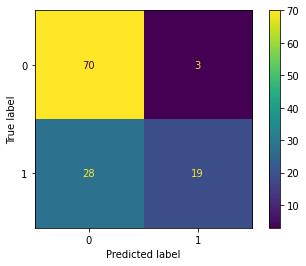

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, lr_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
df_pred=pd.merge(X_test,pd.DataFrame(lr_pred,columns=['predicted']),left_index=True,right_index=True)

In [ ]:
df_pred.head()

,User ID,Age,EstimatedSalary,gender,predicted
33,15776733,28,44000,0,0
93,15699284,29,28000,0,0
84,15798659,30,62000,0,0
94,15786993,29,83000,0,0
9,15727311,35,65000,0,0


In [ ]:
score =accuracy_score(y_test,lr_pred) #Aufgabe
score

0.7416666666666667

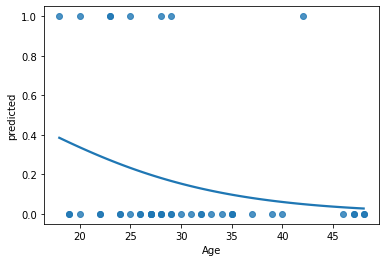

In [ ]:
sns.regplot(x="Age", y='predicted',data=df_pred ,logistic=True, ci=None)

**Fazit?**

<u>**Szenario 2:**</u>

Das Universitätsklinikum Leipzig fragt uns, ob wir ein System erstellen können, dass in der Lage ist, verlässlich vorherzusagen, ob ein Patient an Diabetes leidet oder nicht. Dafür stellt es uns einen Datensatz mit anonymisierten Patientendaten zur Verfügung. 

Eure Aufgabe ist es, ein logistisches Regressionsmodell zu bauen, das diese Prädiktion vornehmen kann. 

<u>Allgemeine Vorgehensweise:</u>


1.   Daten einlesen und aufbereiten
2.   Modell initialisieren
3.   Modell trainieren
4.   Modell testen



Schritt 1: Daten aufbereiten

In [ ]:
import pandas as pd

diabetes = pd.read_csv("diabetes.csv", sep=",")

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable

X = diabetes.iloc[:,0:8] # Features
y = diabetes.iloc[:,8] # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Schritt 2: Modell initialisieren

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

Schritt 3: Modell trainieren

In [ ]:
# fit the model with data
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Schritt 4: Modell testen

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7792207792207793


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[141,  16],
       [ 35,  39]])

# 3. Ressourcen zum Lernen

*   MLE: https://youtu.be/XepXtl9YKwc?t=274
*   Logistische Regression: https://www.youtube.com/watch?v=BfKanl1aSG0



# 4. Zusammenfassung



*   Wir haben die grundlegende Funktionsweise der MLE kennengelernt
*   MLE spielt bei der logistischen Regression eine wesentliche Rolle
*   Wir können ein einfaches ML-Problem selbstständig lösen

